# Загрузка библиотек

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score, f1_score, log_loss
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
RAND = 10

# Импорт данных

In [2]:
data = pd.read_csv('Credit Scoring.csv')
data

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


# Информация о данных

In [3]:
print(f'Size = {data.shape}')

Size = (73799, 19)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [5]:
data.education.isna().sum()/data.shape[0]*100

0.41599479667746175

In [6]:
data.isna().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

# Заполнение пустых значений модой

In [7]:
ed_mode = data.education.mode()[0]
ed_mode

'SCH'

In [8]:
data.education = data.education.fillna(ed_mode)

In [9]:
data.isna().sum()

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
default             0
dtype: int64

In [10]:
data.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,31841.921168,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [11]:
data.nunique()

client_id           73799
app_date              120
education               5
sex                     2
age                    52
car                     2
car_type                2
decline_app_cnt        21
good_work               2
score_bki           69096
bki_request_cnt        38
region_rating           7
home_address            3
work_address            3
income                966
sna                     4
first_time              4
foreign_passport        2
default                 2
dtype: int64

In [12]:
data.home_address.unique()

array([1, 2, 3], dtype=int64)

In [13]:
data.work_address.unique()

array([2, 3, 1], dtype=int64)

# Построение корреляционной матрицы

<AxesSubplot:>

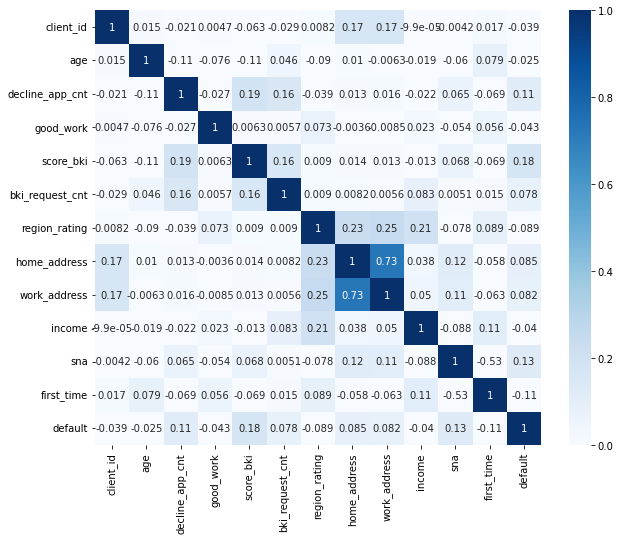

In [14]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(data.corr(), vmin=0, vmax=1, cmap = 'Blues', annot = True)

# Удаление столбца

In [15]:
data = data.drop(columns = ['work_address']) 
data

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,13000,2,3,N,1


In [16]:
data.duplicated().sum()

0

# Визуализация данных

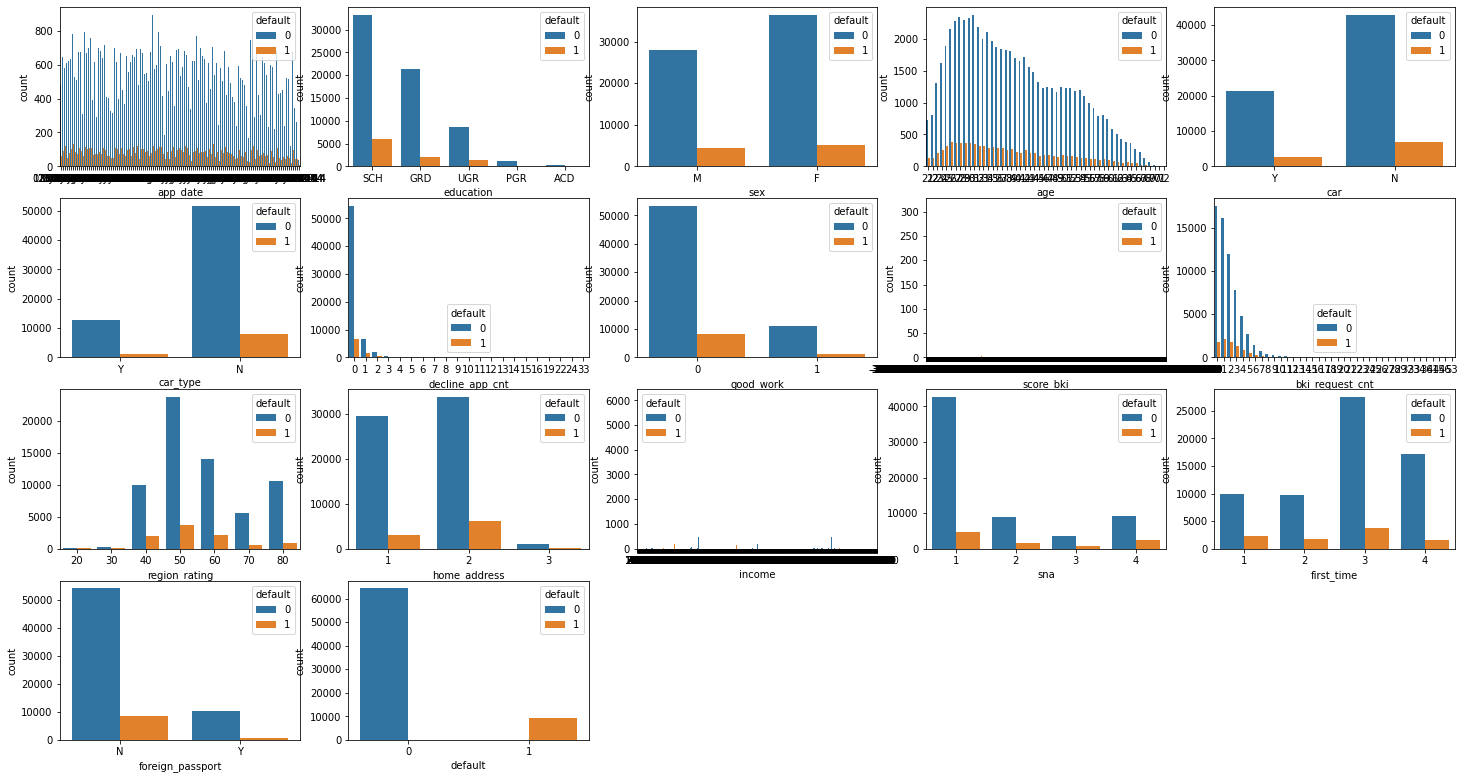

In [ ]:
plt.figure(figsize = (25, 17))
for i in range(1, len(data.columns)):
    plt.subplot(5, 5, i)
    sns.countplot(x = data[data.columns[i]], hue = data['default'])

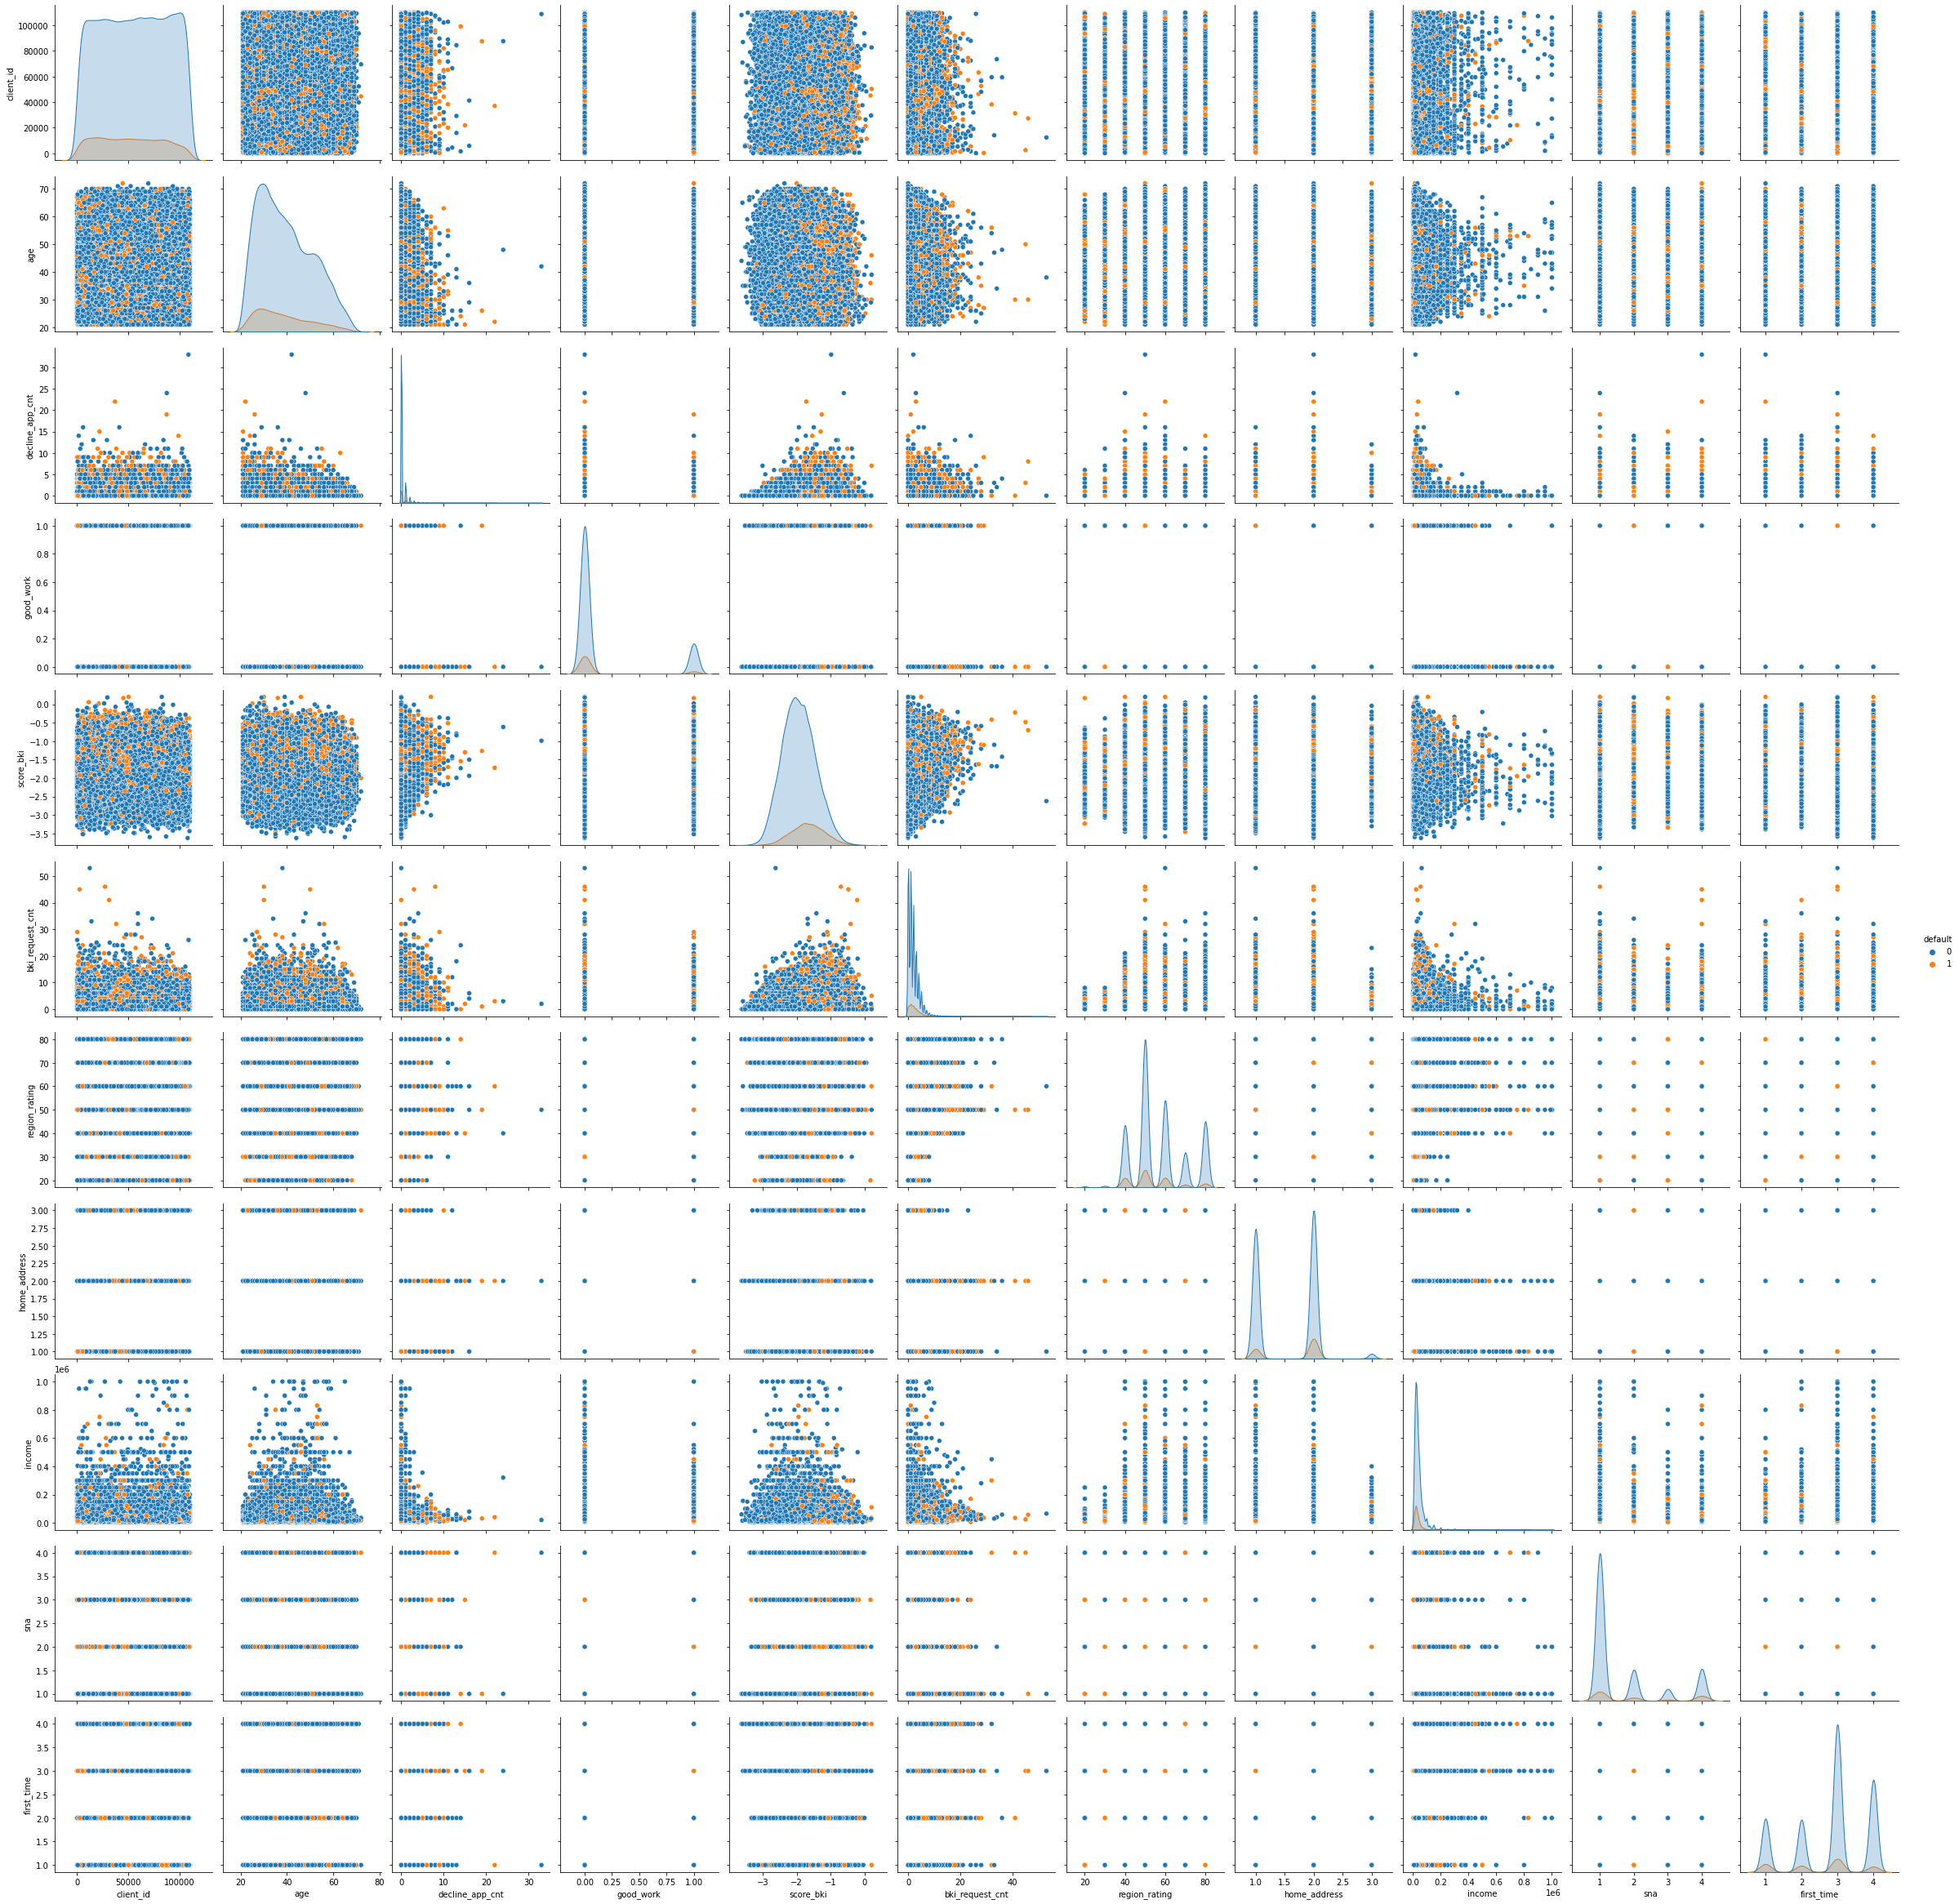

In [7]:
sns.pairplot(data, hue="default", height=3)
plt.show()

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

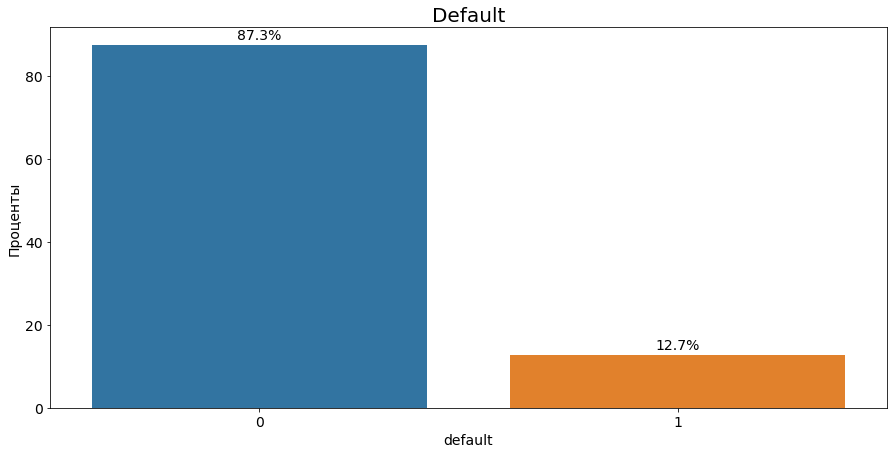

In [17]:
norm_target = (data.default.value_counts(normalize=True).mul(100).rename('percent').reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14)

plt.title('Default', fontsize=20)
plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.005, '0.005'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.015, '0.015'),
  Text(0, 0.02, '0.020'),
  Text(0, 0.025, '0.025'),
  Text(0, 0.03, '0.030'),
  Text(0, 0.035, '0.035'),
  Text(0, 0.04, '0.040'),
  Text(0, 0.045, '0.045')])

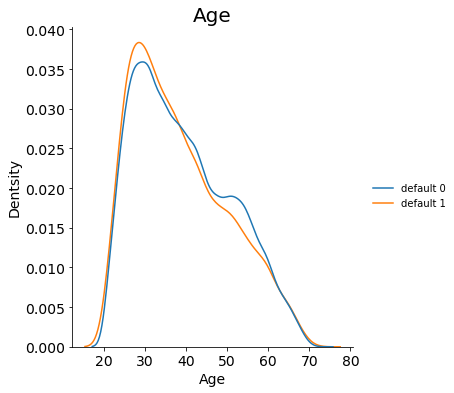

In [18]:
sns.displot({"default 0": data[data.default == 0].age, "default 1": data[data.default == 1].age}, kind="kde", common_norm=False)

plt.title('Age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [19]:
data.groupby('default')['age'].median()

default
0    38.0
1    36.0
Name: age, dtype: float64

In [20]:
data.groupby('default')['age'].mean()

default
0    39.390504
1    38.525395
Name: age, dtype: float64

In [21]:
data.groupby('default')['age'].apply(lambda x: x.value_counts().index[0]).reset_index()

,default,age
0,0,31
1,1,26


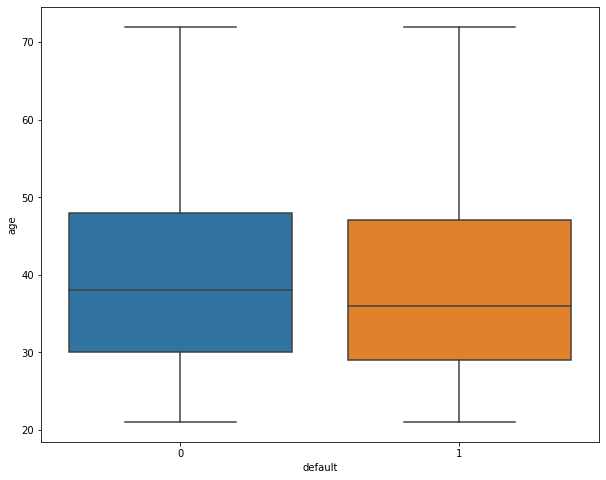

In [22]:
sns.boxplot(x = 'default' , y='age', data = data)
plt.show()

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.01, '0.01'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.05, '0.05')])

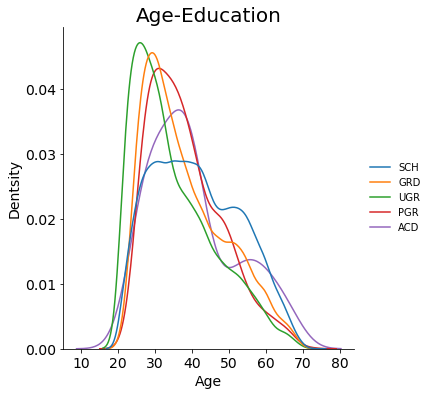

In [23]:
sns.displot({"SCH": data[data.education == "SCH"].age, "GRD": data[data.education == "GRD"].age, 
             "UGR": data[data.education == "UGR"].age, "PGR": data[data.education == "PGR"].age, 
             "ACD": data[data.education == "ACD"].age}, kind="kde", common_norm=False)

plt.title('Age-Education', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

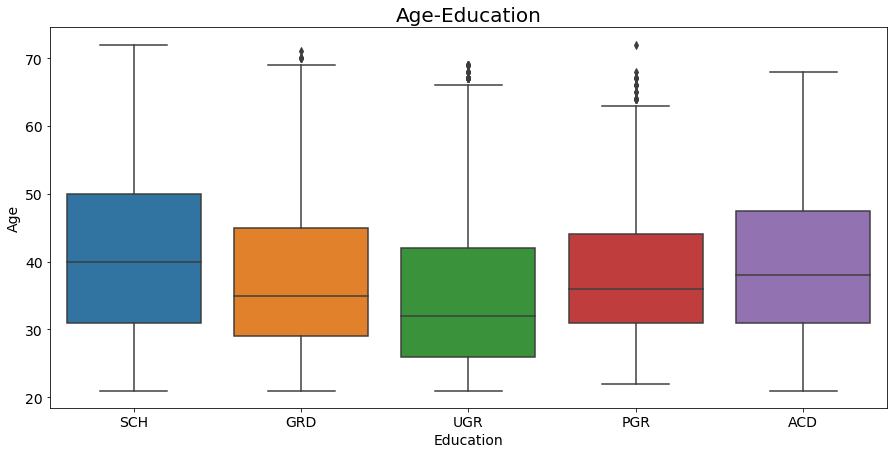

In [24]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='education', y='age', data=data)

plt.title('Age-Education', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

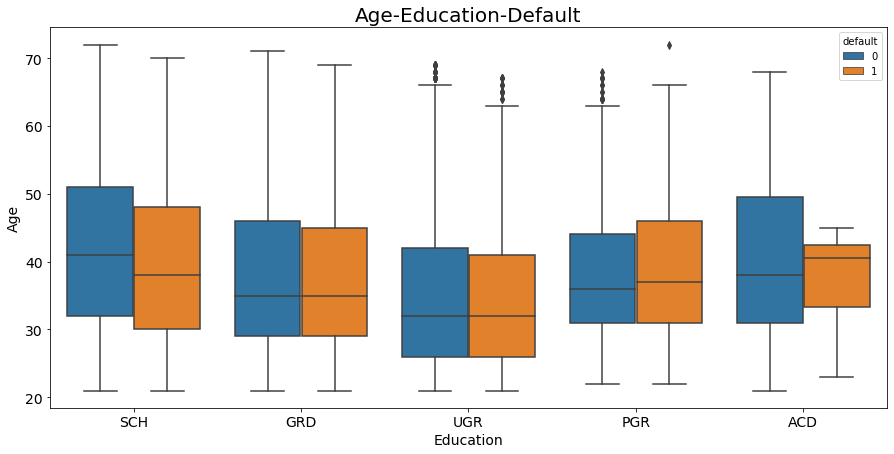

In [25]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='education', y='age', hue='default', data=data)

plt.title('Age-Education-Default', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [26]:
data.groupby('education')['age'].median()

education
ACD    38.0
GRD    35.0
PGR    36.0
SCH    40.0
UGR    32.0
Name: age, dtype: float64

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

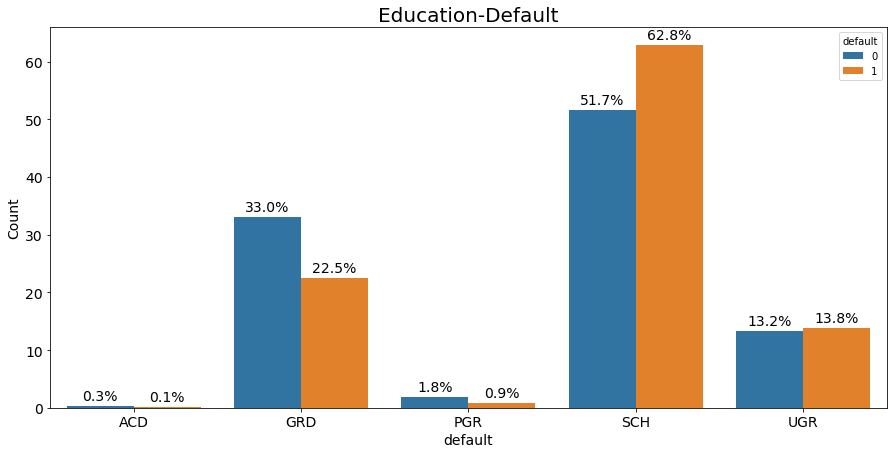

In [27]:
plt.figure(figsize=(15, 7))
educ_def = (data.groupby(['default'])['education'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
            .sort_values('education'))
ax = sns.barplot(x="education", y="percentage", hue="default", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14)

plt.title('Education-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([0.0e+00, 5.0e-06, 1.0e-05, 1.5e-05, 2.0e-05, 2.5e-05, 3.0e-05]),
 [Text(0, 0.0, '0.0'),
  Text(0, 4.9999999999999996e-06, '0.5'),
  Text(0, 9.999999999999999e-06, '1.0'),
  Text(0, 1.4999999999999999e-05, '1.5'),
  Text(0, 1.9999999999999998e-05, '2.0'),
  Text(0, 2.4999999999999998e-05, '2.5'),
  Text(0, 2.9999999999999997e-05, '3.0')])

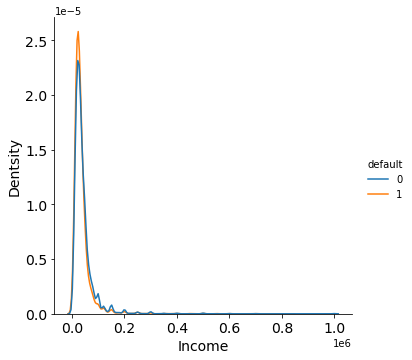

In [28]:
sns.displot(data, x='income', hue='default', kind="kde", common_norm=False)

plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

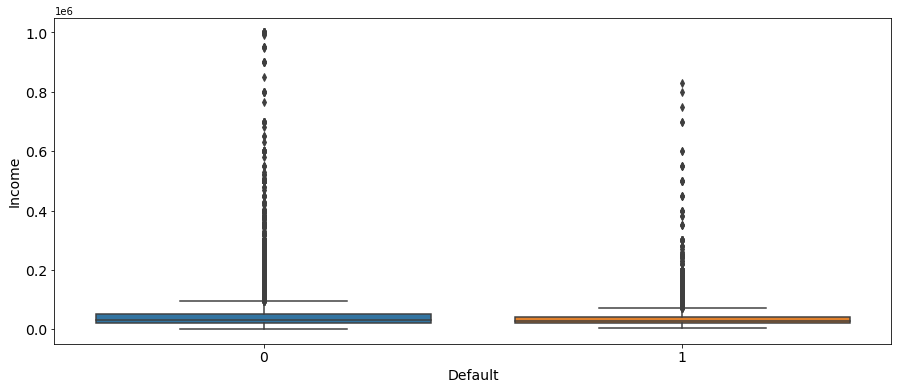

In [29]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='default', y='income', data=data)

plt.ylabel('Income', fontsize=14)
plt.xlabel('Default', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [30]:
data.groupby('default')['income'].mean()

default
0    41799.713288
1    36288.113316
Name: income, dtype: float64

In [31]:
data.groupby('default')['income'].median()

default
0    30000.0
1    28000.0
Name: income, dtype: float64

In [34]:
data_income = data.copy()
data_income.income = np.log(data.income+1)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

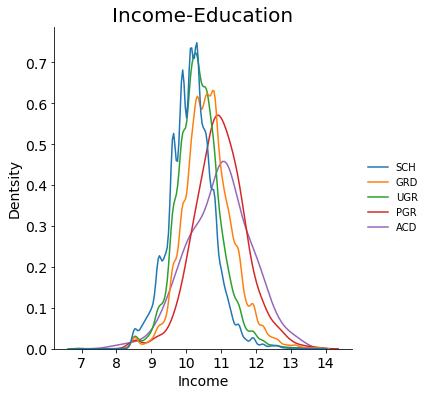

In [35]:
sns.displot({"SCH": data_income[data_income.education == "SCH"].income, 
             "GRD": data_income[data_income.education == "GRD"].income, 
             "UGR": data_income[data_income.education == "UGR"].income,
             "PGR": data_income[data_income.education == "PGR"].income, 
             "ACD": data_income[data_income.education == "ACD"].income}, kind="kde", common_norm=False)

plt.title('Income-Education', fontsize=20)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Нормализация

In [36]:
data.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'income', 'sna', 'first_time',
       'foreign_passport', 'default'],
      dtype='object')

In [37]:
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income', 'first_time','region_rating']

Text(0.5, 0.98, 'Histograms of various features')

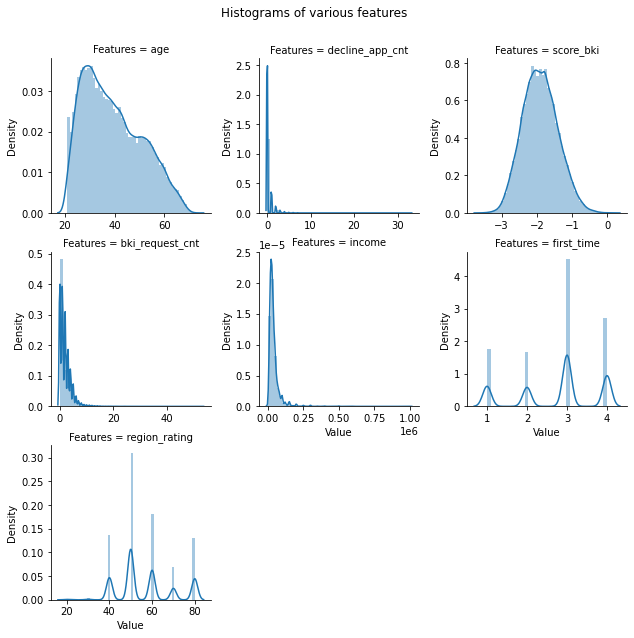

In [38]:
numeric_features = data[num_cols]
numeric_features = numeric_features.stack().reset_index().rename(columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features", col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features")

In [39]:
for i in ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']:
    data[i] = np.log(data[i]+1)

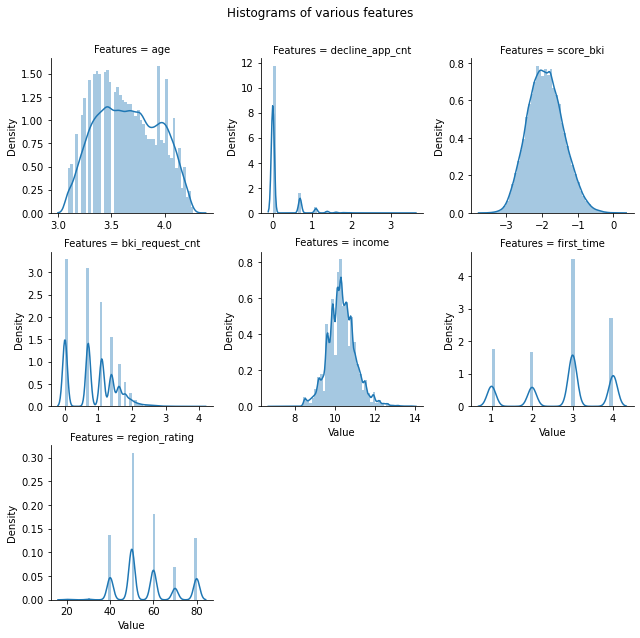

In [40]:
numeric_features = data[num_cols]
numeric_features = numeric_features.stack().reset_index().rename(columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features", col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

# Введение нового признака

In [41]:
data

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,4.143135,Y,Y,0.000000,0,-2.008753,0.693147,50,1,9.798183,4,1,N,0
1,63161,12MAR2014,SCH,F,4.094345,N,N,0.000000,0,-1.532276,1.386294,50,2,9.852247,4,1,N,0
2,25887,01FEB2014,SCH,M,3.258097,Y,N,1.098612,0,-1.408142,0.693147,80,1,10.308986,1,4,Y,0
3,16222,23JAN2014,SCH,F,3.988984,N,N,0.000000,0,-2.057471,1.098612,50,2,9.210440,1,3,N,0
4,101655,18APR2014,GRD,M,3.891820,N,N,0.000000,1,-1.244723,0.693147,60,2,10.308986,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,3.828641,N,N,0.000000,0,-1.792064,1.386294,50,1,9.741027,4,4,N,0
73795,76821,24MAR2014,SCH,M,3.737670,Y,Y,0.000000,0,-2.058029,0.693147,50,2,11.156265,1,4,N,0
73796,103695,22APR2014,SCH,M,3.465736,N,N,0.000000,0,-1.512635,1.609438,80,2,10.714440,2,2,N,0
73797,861,04JAN2014,SCH,F,3.401197,N,N,0.000000,1,-1.479334,1.386294,50,1,9.472782,2,3,N,1


In [42]:
# Новый признак - месяц
data['app_date'] = pd.to_datetime(data['app_date'], format='%d%b%Y')
data['month'] = data['app_date'].dt.month.astype(object)

data.drop(['app_date'],  axis=1, inplace=True)

In [43]:
data

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,income,sna,first_time,foreign_passport,default,month
0,25905,SCH,M,4.143135,Y,Y,0.000000,0,-2.008753,0.693147,50,1,9.798183,4,1,N,0,2
1,63161,SCH,F,4.094345,N,N,0.000000,0,-1.532276,1.386294,50,2,9.852247,4,1,N,0,3
2,25887,SCH,M,3.258097,Y,N,1.098612,0,-1.408142,0.693147,80,1,10.308986,1,4,Y,0,2
3,16222,SCH,F,3.988984,N,N,0.000000,0,-2.057471,1.098612,50,2,9.210440,1,3,N,0,1
4,101655,GRD,M,3.891820,N,N,0.000000,1,-1.244723,0.693147,60,2,10.308986,1,4,Y,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,GRD,F,3.828641,N,N,0.000000,0,-1.792064,1.386294,50,1,9.741027,4,4,N,0,3
73795,76821,SCH,M,3.737670,Y,Y,0.000000,0,-2.058029,0.693147,50,2,11.156265,1,4,N,0,3
73796,103695,SCH,M,3.465736,N,N,0.000000,0,-1.512635,1.609438,80,2,10.714440,2,2,N,0,4
73797,861,SCH,F,3.401197,N,N,0.000000,1,-1.479334,1.386294,50,1,9.472782,2,3,N,1,1


# Бинаризация

In [44]:
cat_cols = ['education', 'sex', 'car', 'car_type', 'good_work', 'home_address', 'foreign_passport', 'sna', 'month']

In [45]:
num_cols = list(data.dtypes[data.dtypes == float].index) + list(data.dtypes[data.dtypes == int].index)[1:-1]

In [46]:
num_cols

['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income']

In [47]:
data_label = pd.get_dummies(data, columns=cat_cols, drop_first=True).drop('client_id', axis=1)

In [48]:
data_label

,age,decline_app_cnt,score_bki,bki_request_cnt,region_rating,income,first_time,default,education_GRD,education_PGR,...,good_work_1,home_address_2,home_address_3,foreign_passport_Y,sna_2,sna_3,sna_4,month_2,month_3,month_4
0,4.143135,0.000000,-2.008753,0.693147,50,9.798183,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,4.094345,0.000000,-1.532276,1.386294,50,9.852247,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,3.258097,1.098612,-1.408142,0.693147,80,10.308986,4,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,3.988984,0.000000,-2.057471,1.098612,50,9.210440,3,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3.891820,0.000000,-1.244723,0.693147,60,10.308986,4,0,1,0,...,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,3.828641,0.000000,-1.792064,1.386294,50,9.741027,4,0,1,0,...,0,0,0,0,0,0,1,0,1,0
73795,3.737670,0.000000,-2.058029,0.693147,50,11.156265,4,0,0,0,...,0,1,0,0,0,0,0,0,1,0
73796,3.465736,0.000000,-1.512635,1.609438,80,10.714440,2,0,0,0,...,0,1,0,0,1,0,0,0,0,1
73797,3.401197,0.000000,-1.479334,1.386294,50,9.472782,3,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# Разделение данных

In [49]:
x = data_label.drop('default', axis=1)
y = data_label['default']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, shuffle=True, random_state=RAND)

# Обучение моделей

In [86]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_score = lr.predict_proba(x_test)[:,1]

In [87]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.7251912800386808
accuracy: 0.6785230352303523
precision: 0.2282793867120954
recall: 0.6435432230522946
f1: 0.33701271482464723


In [88]:
table = pd.DataFrame(index=['roc-auc', 'accuracy', 'precision', 'recall', 'f1'])
table['LogisticRegression'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                 precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

In [90]:
lr = KNeighborsClassifier(n_neighbors = 5)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_score = lr.predict_proba(x_test)[:,1]

In [91]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.5969063370089998
accuracy: 0.8594850948509485
precision: 0.2826086956521739
recall: 0.06937033084311633
f1: 0.11139674378748929


In [92]:
table['KNeighborsClassifier'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

In [93]:
lr = GaussianNB()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_score = lr.predict_proba(x_test)[:,1]

In [94]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.6928003487109934
accuracy: 0.7841463414634147
precision: 0.2593543653705062
recall: 0.37726787620064034
f1: 0.3073913043478261


In [95]:
table['GaussianNB'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                         precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

In [96]:
lr = RandomForestClassifier()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_score = lr.predict_proba(x_test)[:,1]

In [97]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.6977678694921113
accuracy: 0.8714092140921409
precision: 0.35714285714285715
recall: 0.016008537886873
f1: 0.030643513789581203


In [98]:
table['RandomForestClassifier'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                     precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

In [99]:
lr = GradientBoostingClassifier()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_score = lr.predict_proba(x_test)[:,1]

In [100]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.7268748309409284
accuracy: 0.8724254742547426
precision: 0.4470588235294118
recall: 0.020277481323372464
f1: 0.03879530372639101


In [101]:
table['GradientBoostingClassifier'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                         precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                         f1_score(y_test, y_pred)]

In [102]:
lr = MLPClassifier(random_state = 1, max_iter = 300)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_score = lr.predict_proba(x_test)[:,1]

In [103]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.7273112580214544
accuracy: 0.8724254742547426
precision: 0.46017699115044247
recall: 0.02774813233724653
f1: 0.05234021137393055


In [104]:
table['MLPClassifier'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                            precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

In [105]:
lr = LinearDiscriminantAnalysis()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_score = lr.predict_proba(x_test)[:,1]

In [106]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.7251712786837238
accuracy: 0.8723577235772357
precision: 0.47093023255813954
recall: 0.0432230522945571
f1: 0.07917888563049855


In [107]:
table['LinearDiscriminantAnalysis'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                         precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                         f1_score(y_test, y_pred)]

In [108]:
lr = QuadraticDiscriminantAnalysis()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_score = lr.predict_proba(x_test)[:,1]

In [109]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.7060484511497342
accuracy: 0.7730352303523035
precision: 0.2631578947368421
recall: 0.4375667022411953
f1: 0.3286573146292585


In [110]:
table['QuadraticDiscriminantAnalysis'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                            precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                            f1_score(y_test, y_pred)]

In [111]:
table

,LogisticRegression,KNeighborsClassifier,GaussianNB,RandomForestClassifier,GradientBoostingClassifier,MLPClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
roc-auc,0.725191,0.596906,0.692800,0.697768,0.726875,0.727311,0.725171,0.706048
accuracy,0.678523,0.859485,0.784146,0.871409,0.872425,0.872425,0.872358,0.773035
precision,0.228279,0.282609,0.259354,0.357143,0.447059,0.460177,0.470930,0.263158
recall,0.643543,0.069370,0.377268,0.016009,0.020277,0.027748,0.043223,0.437567
f1,0.337013,0.111397,0.307391,0.030644,0.038795,0.052340,0.079179,0.328657


# Выбор гиперпараметров

In [68]:
model = LogisticRegression(class_weight = 'balanced')
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}
logreg = GridSearchCV(model,grid,cv=10)
logreg.fit(x_train,y_train)

print("Лучшие гиперпараметры для модели:",logreg.best_params_)
print("accuracy :",logreg.best_score_)

Лучшие гиперпараметры для модели: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.6739613590443884


In [112]:
lr = LogisticRegression(class_weight = 'balanced', C = 0.01, penalty = 'l1', solver = 'liblinear')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_score = lr.predict_proba(x_test)[:,1]

In [113]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.7214774466709215
accuracy: 0.6775067750677507
precision: 0.22535211267605634
recall: 0.6318036286019211
f1: 0.33221099887766553


In [114]:
table['LogisticRegression2'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

In [115]:
table

,LogisticRegression,KNeighborsClassifier,GaussianNB,RandomForestClassifier,GradientBoostingClassifier,MLPClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,LogisticRegression2
roc-auc,0.725191,0.596906,0.692800,0.697768,0.726875,0.727311,0.725171,0.706048,0.721477
accuracy,0.678523,0.859485,0.784146,0.871409,0.872425,0.872425,0.872358,0.773035,0.677507
precision,0.228279,0.282609,0.259354,0.357143,0.447059,0.460177,0.470930,0.263158,0.225352
recall,0.643543,0.069370,0.377268,0.016009,0.020277,0.027748,0.043223,0.437567,0.631804
f1,0.337013,0.111397,0.307391,0.030644,0.038795,0.052340,0.079179,0.328657,0.332211


# Усовершенствование модели

In [133]:
data_2 = pd.read_csv('Credit Scoring.csv')
data_2

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [134]:
ed_mode = data_2.education.mode()[0]

In [135]:
data_2.education = data_2.education.fillna(ed_mode)

<AxesSubplot:>

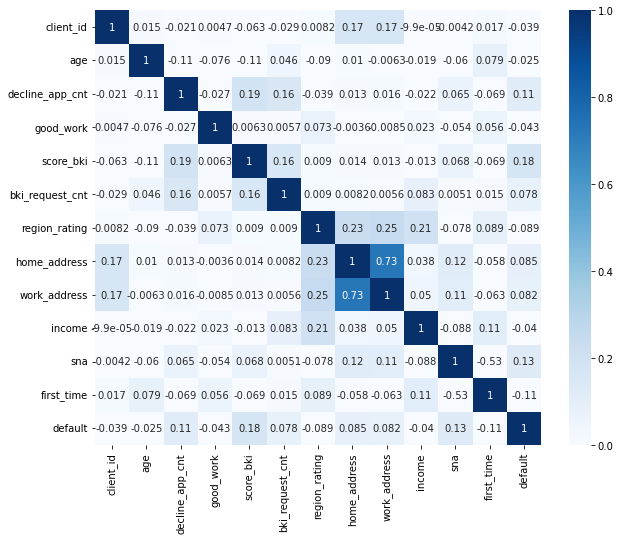

In [136]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(data_2.corr(), vmin=0, vmax=1, cmap = 'Blues', annot = True)

In [137]:
data_2 = data_2.drop(columns = ['work_address']) 

In [138]:
for i in ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']:
    data_2[i] = np.log(data_2[i]+1)

In [139]:
# Новый признак - месяц
data_2['app_date'] = pd.to_datetime(data_2['app_date'], format='%d%b%Y')
data_2['month'] = data_2['app_date'].dt.month.astype(object)

data_2.drop(['app_date'],  axis=1, inplace=True)

In [140]:
# Средний доход с учетом рейтинга региона
mean_inc_reg = data_2.groupby('region_rating')['income'].median().to_dict()
data_2['mean_income_region'] = data_2['region_rating'].map(mean_inc_reg)
# Средний доход с учетом возраста
mean_inc_age = data_2.groupby('age')['income'].median().to_dict()
data_2['mean_income_age'] = data_2['age'].map(mean_inc_age)
# Средний score bki с учетом возраста
mean_bki_age = data_2.groupby('age')['score_bki'].median().to_dict()
data_2['mean_bki_age'] = data_2['age'].map(mean_bki_age)

In [141]:
cat_cols = ['education', 'sex', 'car', 'car_type', 'good_work', 'home_address', 'foreign_passport', 'sna', 'month']

In [142]:
num_cols = list(data_2.dtypes[data_2.dtypes == float].index) + list(data_2.dtypes[data_2.dtypes == int].index)[1:-1]

In [143]:
data_label = pd.get_dummies(data_2, columns=cat_cols, drop_first=True).drop('client_id', axis=1)

In [144]:
x = data_label.drop('default', axis=1)
y = data_label['default']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, shuffle=True, random_state=RAND)

In [145]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_score = lr.predict_proba(x_test)[:,1]

In [146]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

roc-auc: 0.727462448387808
accuracy: 0.6775067750677507
precision: 0.22947131608548932
recall: 0.6531483457844184
f1: 0.33962264150943394


In [147]:
table['LogisticRegression3'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

In [148]:
table

,LogisticRegression,KNeighborsClassifier,GaussianNB,RandomForestClassifier,GradientBoostingClassifier,MLPClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,LogisticRegression2,LogisticRegression3
roc-auc,0.725191,0.596906,0.692800,0.697768,0.726875,0.727311,0.725171,0.706048,0.721477,0.727462
accuracy,0.678523,0.859485,0.784146,0.871409,0.872425,0.872425,0.872358,0.773035,0.677507,0.677507
precision,0.228279,0.282609,0.259354,0.357143,0.447059,0.460177,0.470930,0.263158,0.225352,0.229471
recall,0.643543,0.069370,0.377268,0.016009,0.020277,0.027748,0.043223,0.437567,0.631804,0.653148
f1,0.337013,0.111397,0.307391,0.030644,0.038795,0.052340,0.079179,0.328657,0.332211,0.339623


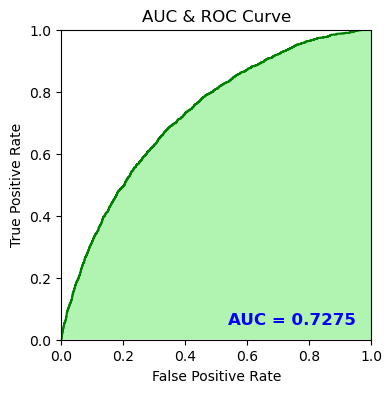

In [151]:
auc = metrics.roc_auc_score(y_test, y_score)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_score)

plt.figure(figsize = (4, 6), dpi = 100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha = 'right', fontsize = 12, weight = 'bold', color = 'blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()